In [1]:
import matplotlib.pyplot as plt
from q_learning.algorithm import QLPolicy
from envs.env_creator import env_creator
from base_rl.eval_policy import EvalDiscreteStatePolicy
from glob import glob
import pandas as pd


In [2]:
plt.rcParams["figure.figsize"] = [20, 12]

In [3]:

device = 'cuda'
steps_per_episode = 1000
model_names = ['model_aeq-20bits4', 'model_aeq-20bits4emb']
experiment_id = '973479'
experiment_type = 'q_learning'
model_files = {model_name: glob(f'tmp/{experiment_type}/{experiment_id}/{model_name}/*' ) for model_name in model_names}
policy_class = QLPolicy


Tag: tmp/mb_q_learning/667023/model_aeq-20bits4emb/x_interval_policy
Episode 9 Reward: -306.96109681670146 || New State Found: False


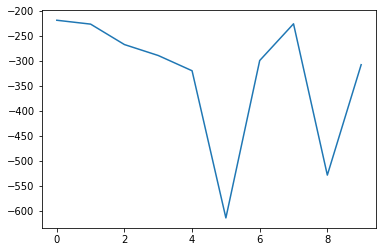

Reward Mean: -328.9730418169368
Reward std : 126.7695937604036


In [4]:
from benchmarks.policy_benchmarks import PolicyBenchmarks

benchmarks = {}
evaluators = []
for model_name,policy_files in model_files.items():
    for policy_file in policy_files:
        eval_policy = policy_class.load(policy_file)
        env_kwargs = {'steps_per_episode': steps_per_episode, 'device': device,
                      'model_path': f'tmp/state_quantization/{model_name}'}
        evaluator = EvalDiscreteStatePolicy(policy=eval_policy, env_creator=env_creator, env_kwargs=env_kwargs, tag=policy_file.split('.')[0])
        evaluators.append(evaluator)

policy_benchmarks = PolicyBenchmarks(evaluators=evaluators, epochs=10)
policy_benchmarks.benchmark()

In [5]:
df = pd.DataFrame(policy_benchmarks.benchmark_metrics)
df.T

,reward,std,unique_obs
tmp/mb_q_learning/667023/model_aeq-20bits4/best_policy,-200.003837,2.703012,133.0
tmp/mb_q_learning/667023/model_aeq-20bits4/last_save_policy,-199.725733,2.950750,153.0
tmp/mb_q_learning/667023/model_aeq-20bits4/x_interval_policy,-200.630644,3.334509,169.0
tmp/mb_q_learning/667023/model_aeq-20bits4emb/best_policy,-225.356286,3.609069,71.0
tmp/mb_q_learning/667023/model_aeq-20bits4emb/x_interval_policy,-328.973042,126.769594,183.0


In [6]:
model_files

{'model_aeq-20bits4': ['tmp/mb_q_learning/667023/model_aeq-20bits4/best_policy.pkl',
  'tmp/mb_q_learning/667023/model_aeq-20bits4/last_save_policy.pkl',
  'tmp/mb_q_learning/667023/model_aeq-20bits4/x_interval_policy.pkl'],
 'model_aeq-20bits4emb': ['tmp/mb_q_learning/667023/model_aeq-20bits4emb/best_policy.pkl',
  'tmp/mb_q_learning/667023/model_aeq-20bits4emb/x_interval_policy.pkl']}